In [1]:
import numpy as np
import matplotlib.pyplot as plt
import batman
import emcee
from astropy.time import Time
import h5py
import corner
from matplotlib.ticker import ScalarFormatter
from mc3.stats import time_avg
from astropy.stats import sigma_clip
import importlib
import ipynb.fs.full.model_compare_functions as mcf


['aperr', 'aplev', 'betaper', 'centroid_sx', 'centroid_sy', 'centroid_x', 'centroid_y', 'medflux', 'nappix', 'nskyideal', 'nskypix', 'skyerr', 'skylev', 'status', 'time', 'wave_1d', 'x', 'y']
['aperr', 'aplev', 'betaper', 'centroid_sx', 'centroid_sy', 'centroid_x', 'centroid_y', 'medflux', 'nappix', 'nskyideal', 'nskypix', 'skyerr', 'skylev', 'status', 'time', 'wave_1d', 'x', 'y']
['aperr', 'aplev', 'betaper', 'centroid_sx', 'centroid_sy', 'centroid_x', 'centroid_y', 'medflux', 'nappix', 'nskyideal', 'nskypix', 'skyerr', 'skylev', 'status', 'time', 'wave_1d', 'x', 'y']


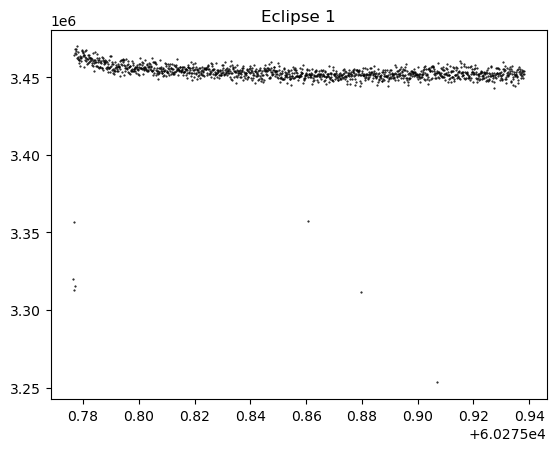

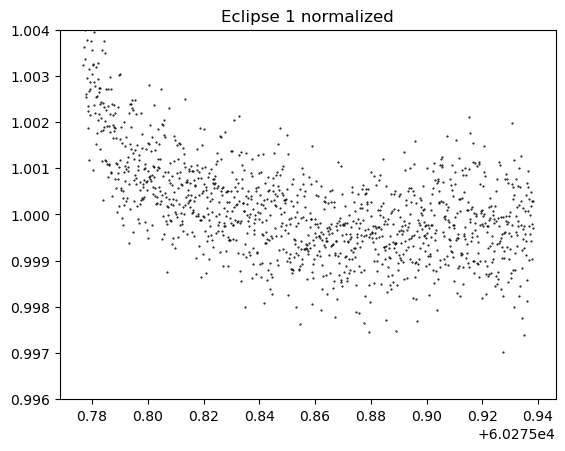

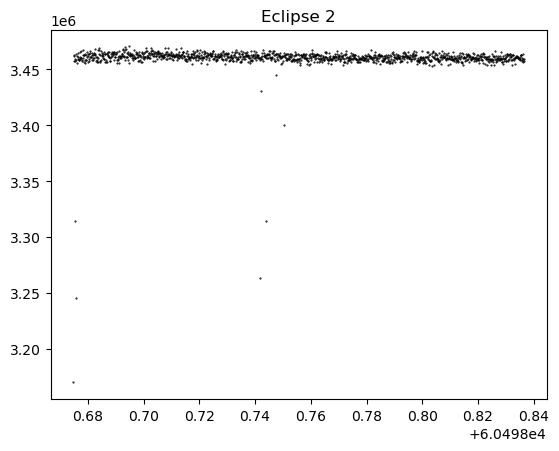

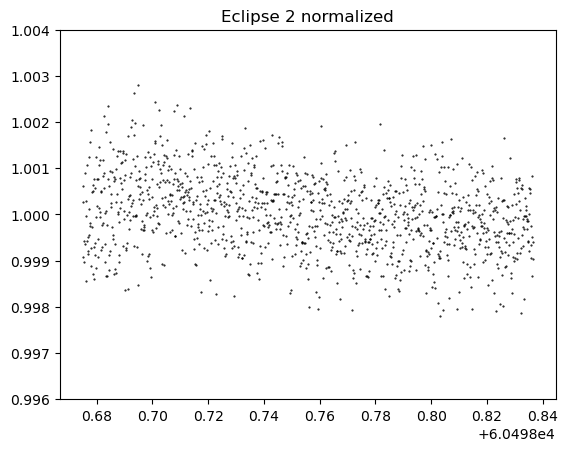

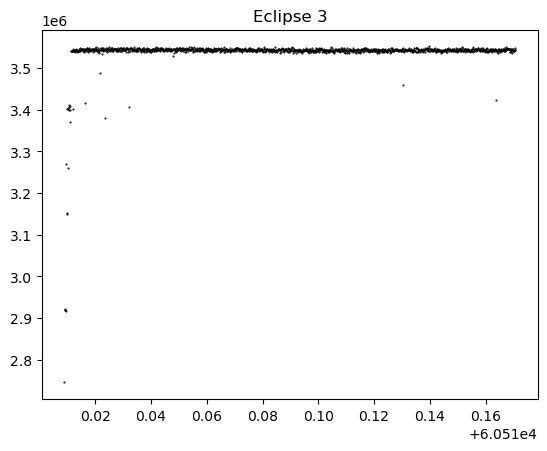

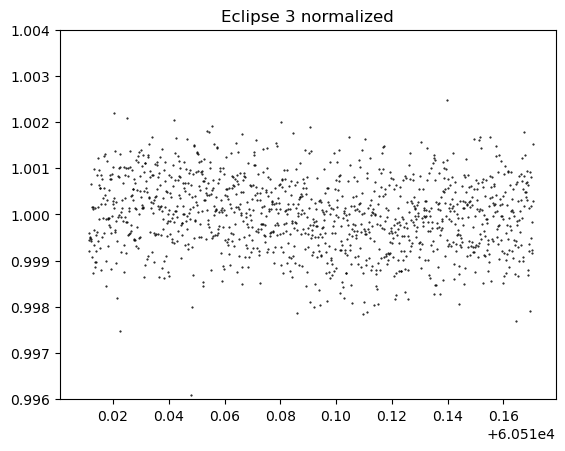

In [2]:
file = {}
file['1'] = '/Volumes/HardDrive/new_extraction_fortune_2025/new_extraction_fortune_2025/Stage3/S3_2025-07-18_new_extraction_fortune_2025_eclipse1/ap5_bg12_30/S3_new_extraction_fortune_2025_ap5_bg12_30_SpecData.h5'
file['2'] = '/Volumes/HardDrive/new_extraction_fortune_2025/Eclipse2/Stage3/S3_2025-08-13_eclipse3_run1/ap5_bg12_30/S3_eclipse3_ap5_bg12_30_SpecData.h5'
file['3'] = '/Volumes/HardDrive/new_extraction_fortune_2025/Eclipse3/Stage3/S3_2025-07-23_eclipse3_run2/ap5_bg12_30/S3_eclipse3_ap5_bg12_30_SpecData.h5'
eclipses = ['1', '2', '3']
time_arr = {}
aplev_arr = {}
aperr_arr = {}
centroid_x_arr = {}
centroid_y_arr = {}
medflux = {}

for e in eclipses:
    with h5py.File(file[e], 'r') as f1: 
        print(list(f1.keys()))
        time_arr[e] = np.array(f1['time'])
        aplev_arr[e] = np.array(f1['aplev'])
        aperr_arr[e] = np.array(f1['aperr'])
        centroid_x_arr[e] = np.array(f1['centroid_x'])
        centroid_y_arr[e] = np.array(f1['centroid_y'])
        #medflux[e] = np.array(f1['medflux'])
        plt.figure()
        plt.plot(time_arr[e], aplev_arr[e], 'k.', markersize=1)
        plt.title(f'Eclipse {e}')
        plt.figure()
        plt.plot(time_arr[e], aplev_arr[e]/np.nanmedian(aplev_arr[e]), 'k.', markersize=1)
        plt.title(f'Eclipse {e} normalized')
        plt.ylim(0.996, 1.004)


    time_arr[e] = np.array(time_arr[e])
    aplev_arr[e] = np.array(aplev_arr[e])
    aperr_arr[e] = np.array(aperr_arr[e])
    centroid_x_arr[e] = np.array(centroid_x_arr[e])
    centroid_y_arr[e] = np.array(centroid_y_arr[e])

# ['aperr', 'aplev', 'betaper', 'centroid_sx', 'centroid_sy', 'centroid_x', 'centroid_y', 'dq', 'err', 'flux', 'mask', 'nappix', 'nskyideal', 'nskypix', 'skyerr', 'skylev', 'status', 'time', 'v0', 'wave_1d', 'x', 'y']
# ['aperr', 'aplev', 'betaper', 'centroid_sx', 'centroid_sy', 'centroid_x', 'centroid_y', 'medflux', 'nappix', 'nskyideal', 'nskypix', 'skyerr', 'skylev', 'status', 'time', 'wave_1d', 'x', 'y']


10 outliers in eclipse 1
1252 valid points in eclipse 1
8 outliers in eclipse 2
1254 valid points in eclipse 2
26 outliers in eclipse 3
1236 valid points in eclipse 3


Text(0, 0.5, 'Normalized flux')

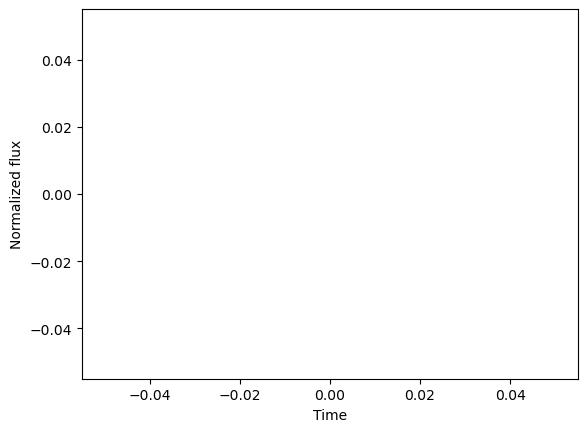

In [3]:
plt.figure()
time = []
aplev = []

aplev_arr_clipped = {}
time_arr_clipped = {}
aperr_arr_clipped = {}
centroid_x_arr_clipped = {}
centroid_y_arr_clipped = {}

outliers = {}
valid = {}
path = '/Users/alexandrarochon/Programming/LHS1140-Eureka/myAnalysis/MIRI_Eclipse_Photometry_Analysis/Array_ModelComparison/Clipped_arrays/'

## CHANGE instead of re-clipping, load clipped arrays
for e in eclipses:
    # Apply sigma clipping
    aplev_arr_clipped[e]  = sigma_clip(aplev_arr[e], sigma=4.0)
    outliers[e] = aplev_arr_clipped[e].data[aplev_arr_clipped[e].mask]
    valid[e] = aplev_arr_clipped[e].data[~aplev_arr_clipped[e].mask]
    print(len(outliers[e]), 'outliers in eclipse', e)
    print(len(valid[e]), 'valid points in eclipse', e)
    time_arr_clipped[e] = time_arr[e][~aplev_arr_clipped[e].mask]
    aperr_arr_clipped[e] = aperr_arr[e][~aplev_arr_clipped[e].mask]
    centroid_x_arr_clipped[e] = centroid_x_arr[e][~aplev_arr_clipped[e].mask]
    centroid_y_arr_clipped[e] = centroid_y_arr[e][~aplev_arr_clipped[e].mask]
    aplev_arr_clipped[e] = valid[e]/np.nanmedian(valid[e])
    aperr_arr_clipped[e] = aperr_arr_clipped[e]/np.nanmedian(valid[e])

    #save arrays
    np.save(path+f'aplev_arr_clipped_{e}.npy', aplev_arr_clipped[e])
    np.save(path+f'aperr_arr_clipped_{e}.npy', aperr_arr_clipped[e])
    np.save(path+f'time_arr_clipped_{e}.npy', time_arr_clipped[e])
    np.save(path+f'centroid_x_arr_clipped_{e}.npy', centroid_x_arr_clipped[e])
    np.save(path+f'centroid_y_arr_clipped_{e}.npy', centroid_y_arr_clipped[e])


# len1 = len(time_arr_clipped['1'])
# len2 = len(time_arr_clipped['2'])
# len3 = len(time_arr_clipped['3'])

# time = np.concatenate((time_arr_clipped['1'], time_arr_clipped['2'], time_arr_clipped['3']))
# aplev = np.concatenate((aplev_arr_clipped['1'], aplev_arr_clipped['2'], aplev_arr_clipped['3']))
# aperr = np.concatenate((aperr_arr_clipped['1'], aperr_arr_clipped['2'], aperr_arr_clipped['3']))
# centroid_x = np.concatenate((centroid_x_arr_clipped['1'], centroid_x_arr_clipped['2'], centroid_x_arr_clipped['3']))
# centroid_y = np.concatenate((centroid_y_arr_clipped['1'], centroid_y_arr_clipped['2'], centroid_y_arr_clipped['3']))


# Plot
plt.plot(time, aplev, 'o', markersize=2)
plt.xlabel("Time")
plt.ylabel("Normalized flux")


# dont need to discard anything (ie first iteration bc removed by sigma clipping)

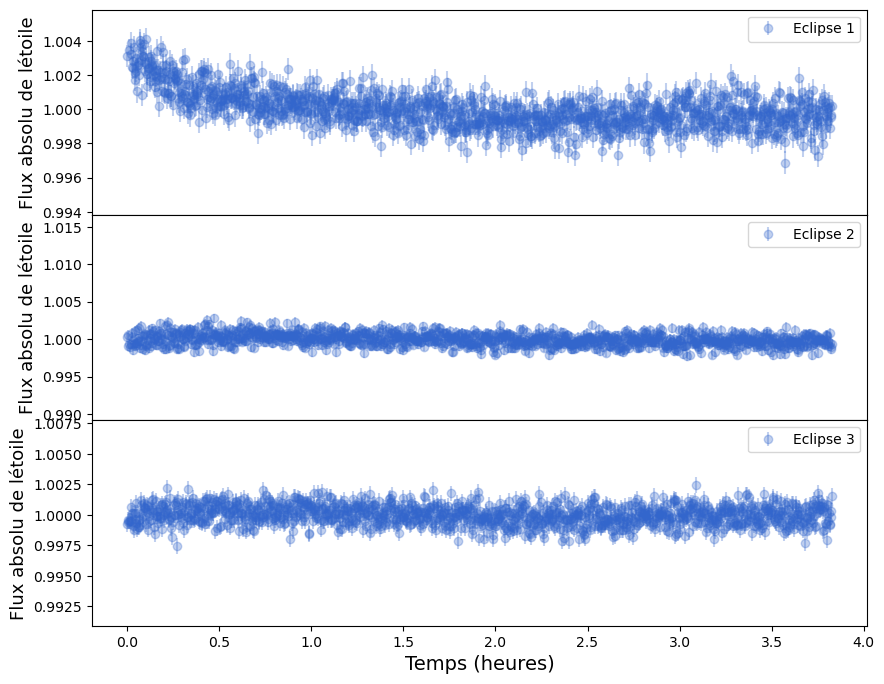

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
aperr_norm = {}
aplev_norm = {}
for i, e in enumerate(eclipses):
    aperr_norm[e] = aperr_arr_clipped[e]/np.mean(aplev_arr_clipped[e])
    aplev_norm[e] = aplev_arr_clipped[e]/np.mean(aplev_arr_clipped[e])
    ax[i].errorbar((time_arr_clipped[e]-time_arr_clipped[e][0])*24, aplev_norm[e], yerr=aperr_norm[e], fmt='o', label='Eclipse '+e, alpha=0.3, color='#3366cc')
    #ax[i].plot((time_arr_clipped[e]-time_arr_clipped[e][0])*24, aplev_norm[e], 'o',color='#3366cc')
    ax[i].set_ylabel('Flux absolu de l''étoile', fontsize=13)
    # make labelfont size bigger
    ax[i].legend()
ax[0].tick_params(labelbottom=False)
# use ylim to compare to other eureka extraction plot
ax[0].set_ylim(0.9938053578628564, 1.005818826005349)
ax[1].set_ylim(0.9891593419675543, 1.016564196120208)
ax[2].set_ylim(0.9909124575025873, 1.0077463937582072)
ax[1].tick_params(labelbottom=False)
ax[2].set_xlabel('Temps (heures)', fontsize=14)
plt.subplots_adjust(hspace=0)
#plt.tight_layout()
plt.show()


In [5]:
# eclipse1 = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
# eclipse1 = eclipse1.mjd
# print(eclipse1-time[0])
# t_s = (60275.875-time[0])*(24)
# print(time[0])
# eclipse1 = t_s
# t0 = (58388.7939-time[0])*(24)
# e_dur = 1.13 # expected eclipse duration in hours
# per = 3.777940*24
# t0 = t0+(per*500)

# eclipses
ecl = {}
ecl['1'] = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
ecl['2']  = Time('2024-07-07 18:34', format = 'iso', scale = 'tdb')
ecl['3']  = Time('2024-07-19 02:34', format = 'iso', scale = 'tdb')

fp = 0.000230

time = {}
for i, e in enumerate(ecl):
    ecl[e] = ecl[e].mjd
    print(time_arr_clipped[e][0], ecl[e])
    ecl[e] = ecl[e]-time_arr_clipped[e][0]
    print('time diff ',ecl[e])
    ecl[e] = ecl[e]*24 # convert to hours
    print(ecl[e])
    time[e] = (time_arr_clipped[e] - time_arr_clipped[e][0])*(24)
    

60275.77672542595 60275.875
time diff  0.09827457404753659
2.358589777140878
60498.67491971186 60498.77361111111
time diff  0.09869139924558112
2.368593581893947
60510.01121016546 60510.106944444444
time diff  0.09573427898430964
2.2976226956234314


In [6]:
# all models to test
model_type = ['linear', 'exp', 'exp+linear', 'double_exp', 'polynomial', 'exp+polynomial', 'linear+polynomial', 'linear_2nd_order_centroid', 'exp_2nd_order_centroid', 'exp+linear_2nd_order_centroid', 'double_exp_2nd_order_centroid', 'polynomial_2nd_order_centroid', 'exp+polynomial_2nd_order_centroid', 'linear+polynomial_2nd_order_centroid']
eclipses = ['1', '2', '3']

#missing_models = ['linear', 'exp','double_exp', 'linear_2nd_order_centroid']# 'exp_2nd_order_centroid', 'double_exp_2nd_order_centroid']
# model_type = ['exp+polynomial_2nd_order_centroid']
#model_type = ['polynomial', 'polynomial_2nd_order_centroid', 'exp+polynomial', 'exp+polynomial_2nd_order_centroid', 'linear+polynomial', 'linear+polynomial_2nd_order_centroid', 'exp+linear', 'exp+linear_2nd_order_centroid']
# eclipses = ['1']
#model_type = ['linear', 'linear_2nd_order_centroid', 'exp', 'double_exp']
#eclipses = ['2']
# model_type = ['linear_2nd_order_centroid']
# eclipses = ['3']


In [7]:
# set p0 values from best fits of previous runs
# p0_astro = {}
# p0_detec = {}

# for ecl_nb in eclipses:
#     p0_astro[ecl_nb] = {}
#     p0_detec[ecl_nb] = {}

# p0_astro['1']['double_exp_2nd_order_centroid'] = [2.284137871277616, 0.0003753517024429336]
# p0_detec['1']['double_exp_2nd_order_centroid'] = [-50319.96286304022, 506.8969141055006, 291.0891245550652, -1.1404430067991145, -1.7393147898704537, 
#     -0.28380105447645954 , 0.6133565221809223, 0.00013205233384767532, 0.001901037264478209, 2.685898894497596]
    
# p0_astro['1']['exp'] = [2.356592971621177 , 0.0003068907912431821]
# p0_detec['1']['exp'] = [0.003277109000969019, 1.9433099625692705, 0.9994824562869935]

# p0_astro['3']['double_exp_2nd_order_centroid'] = [2.2276270587793863 , 0.0003731789208577069]
# p0_detec['3']['double_exp_2nd_order_centroid'] = [4.908164437222908 ,42.717105724684004 ,-42.67059263361969 ,-0.8071538348390341 ,1.2727625831273826 ,-0.4660402500870158,1.0546245432977464  ,-0.006609619840787171 ,-0.8020755055693214,  -0.008678698596680042 ]

# p0_astro['3']['exp+polynomial_2nd_order_centroid'] = [2.2339530248842467, 0.00020954615778853608]
# p0_detec['3']['exp+polynomial_2nd_order_centroid'] = [0.40791221616845696 ,0.35226586228564566  ,-0.3259531437533757, -0.17176835141741834  ,0.34054749504998916 ,-0.16890197543406194 ,0.15620288372378208 ,0.21093566826565344,0.22790274331540272   -0.00015118708847947342, -0.003482168495779146, 0.12685164577154878, 1.4649673644628227]

Running MCMC for model: exp+polynomial_2nd_order_centroid on eclipse 1


100%|██████████| 100000/100000 [33:35<00:00, 49.61it/s] 


MCMC result:

     t_s = 2.293986270628923  +0.1184665400596443  -0.0905140396358477
      fp = 0.0002955754785385807  +0.00031513135765274  -0.00018472985287467508
     c_1 = 7.572240429585809  +24.5169707978352  -27639.081801341446
     c_2 = 4.132379239876064  +14.999526632768614  -2445.9856197373256
     c_3 = -4.241923161236274  +2895.205700430974  -15.660243973207358
     c_4 = -0.33658033796237674  +7.366890144241034  -3.8450360371343146
     c_5 = 0.643133920883382  +11.855572411575384  -1.794416017977091
     c_6 = -0.30605261652651916  +0.9884811968778358  -13.893485063014822
     c_7 = 0.0018519758878227542  +0.037518884092459306  -0.0010312095128324635
     c_8 = 7.12806073728051  +5.122232327439108  -2.250552822671577
     c_9 = 0.8858265302868761  +0.36034432606395717  -0.40066902784685465
    c_10 = -6.334499566794167e-05  +5.3707141462318536e-05  -0.0020440753919119454
    c_11 = 0.0005186563617282393  +0.011029872903362067  -0.0003486837509164018
    c_12 = -0.00141785

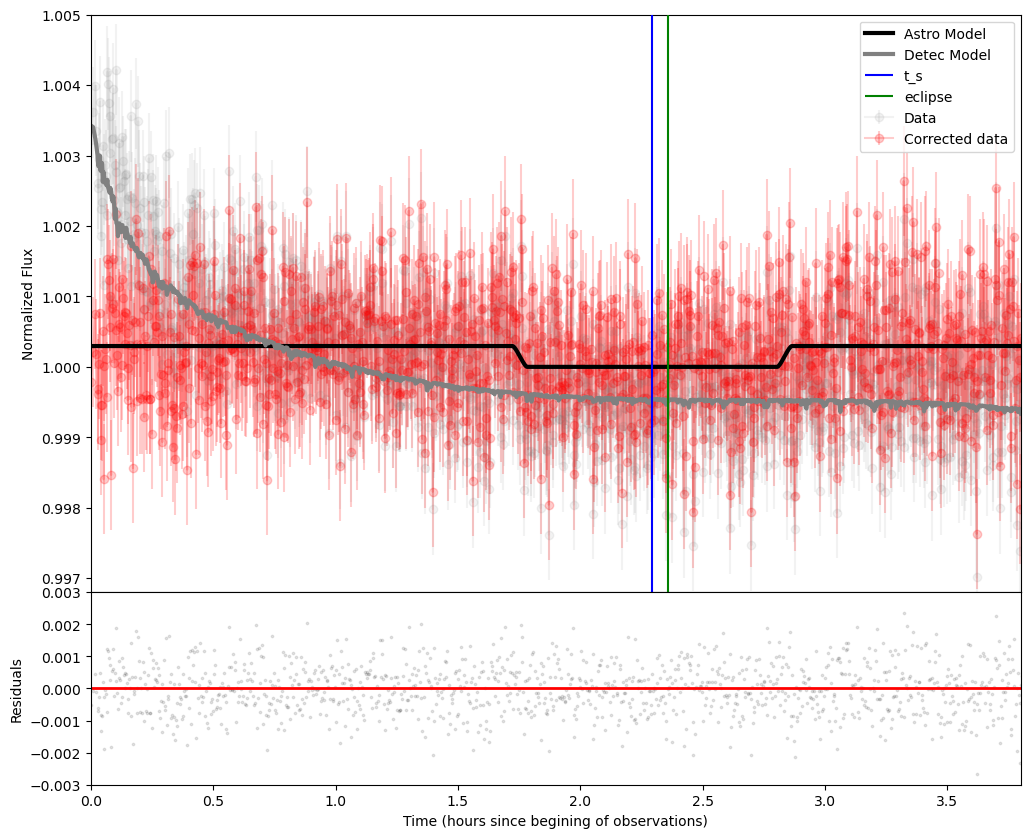

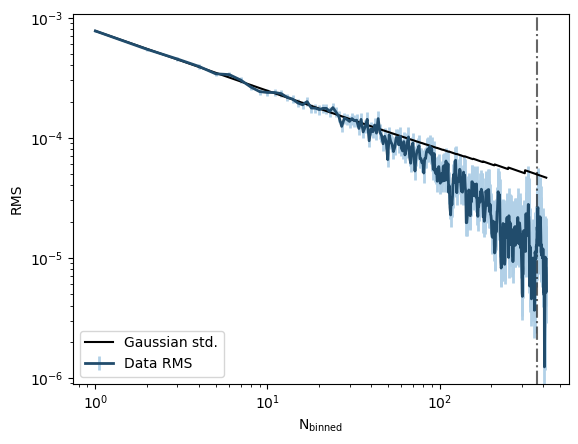

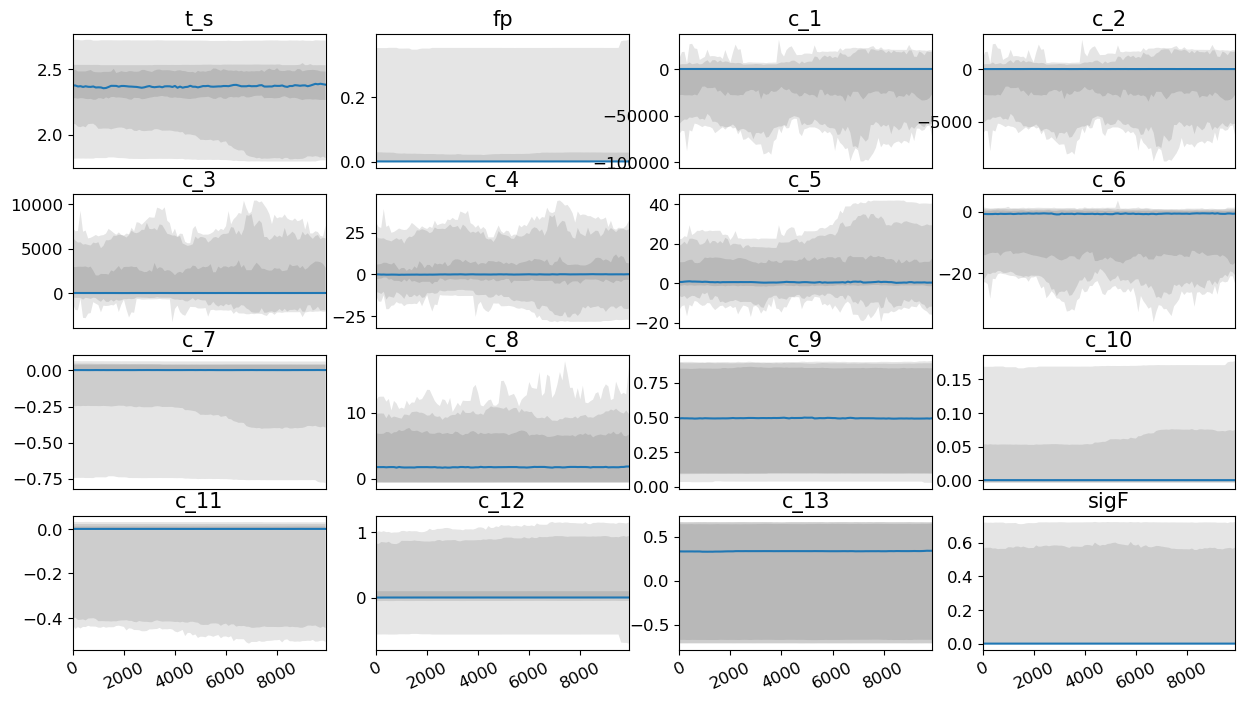

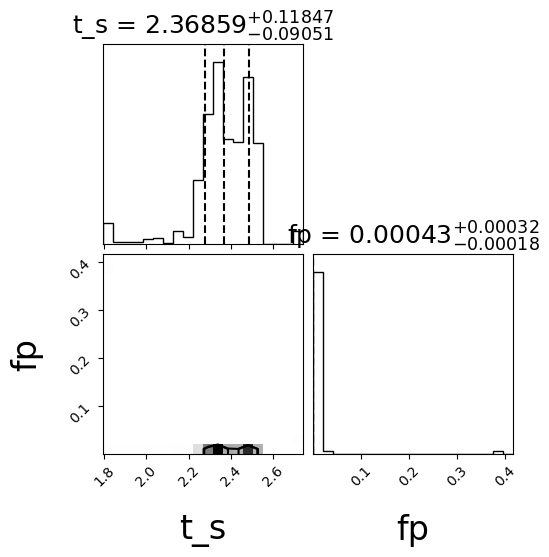

In [9]:
importlib.reload(mcf)
for ecl_nb in eclipses:
    for model in model_type:
        print('Running MCMC for model:', model, 'on eclipse', ecl_nb)
        mcf.run_mcmc(model, time[ecl_nb], aplev_arr_clipped[ecl_nb], aperr_arr_clipped[ecl_nb], centroid_x_arr_clipped[ecl_nb], centroid_y_arr_clipped[ecl_nb], 
                    ecl[ecl_nb], fp, 'MCMC_results/eclipse'+ecl_nb+'/'+model+'/try3', ecl_nb, nstep = 100000, p0_detec = None, p0_astro = None)
## CHANGED THE SAVEPATH FOR THE CHAINS